In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

In [2]:
data = np.array(pd.read_csv('~/DataSet3/1.csv'))

In [3]:
data1=data[:,1:4]
labels = data[:,-1]
labels

array([1., 1., 1., ..., 7., 7., 0.])

**Scalling data to normalize the effect of each dimention and also reduce effect of outliers**

In [4]:
scaler = StandardScaler()
scaler.fit(data1)
sample= scaler.transform(data1)
print(scaler.mean_)

[1910.67337231 2380.28738462 2041.21414154]


**Elbow implementation with Avg Cluster Distance as validation matrix**

In [5]:
cluster_seperation={}
K = range(2,10)
for k in K :
    cluster_seperation[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    #print("Centers = "+str(centers))
    #print("pdist = "+str(pdist(centers)))
    pair_dist=pdist(centers)
    avg_dist=pair_dist.sum()/len(pair_dist)
    print("Avg dist = "+str(avg_dist))
    cluster_seperation[k]=avg_dist
print("Clsuter seperation ="+str(cluster_seperation))

Avg dist = 2.446152177019658
Avg dist = 3.416916810817298
Avg dist = 3.3633532383192235
Avg dist = 3.0616053270566335
Avg dist = 2.807697050132831
Avg dist = 5.020653652591567
Avg dist = 2.9082575707402176
Avg dist = 4.625382178390564
Clsuter seperation ={2: 2.446152177019658, 3: 3.416916810817298, 4: 3.3633532383192235, 5: 3.0616053270566335, 6: 2.807697050132831, 7: 5.020653652591567, 8: 2.9082575707402176, 9: 4.625382178390564}


In [6]:
SSE_array=[]
slope=[]
for key,value in cluster_seperation.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,8):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+2,s])
slope

[2.446152177019658, 3.416916810817298, 3.3633532383192235, 3.0616053270566335, 2.807697050132831, 5.020653652591567, 2.9082575707402176, 4.625382178390564]


[[3, 0.9707646337976397],
 [4, -0.05356357249807431],
 [5, -0.30174791126259004],
 [6, -0.2539082769238026],
 [7, 2.212956602458736],
 [8, -2.112396081851349],
 [9, 1.7171246076503461]]

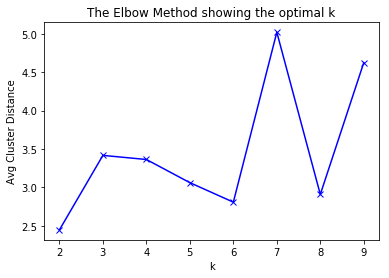

In [7]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('k')
plt.ylabel('Avg Cluster Distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,6):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    # changed based on concavity of the graph
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 4
Optimal Number of Clusters = 5
Optimal Number of Clusters = 7
